**Follow the kNN examples from chapter 2 of Harrington's *Machine Learning in Action* **

In [254]:
%matplotlib inline
# %matplotlib notebook # This allows for interactive plots

In [273]:
from numpy import *
import operator

from os import listdir

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**Classify potential partners based on dating data**

In [298]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()     
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [257]:
def file2matrix(filename):
    love_dictionary = {'largeDoses':3,'smallDoses':2,'didntLike':1}
    fr = open(filename)
    n_lines = len(fr.readlines())
    returnMat = zeros((n_lines,3))
    classLabelVector = []
    fr = open(filename)
    idx = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')        
        returnMat[idx,:] = listFromLine[0:3]
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(listFromLine[-1])
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        idx += 1
    return returnMat, classLabelVector

In [258]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))
    return normDataSet, ranges, minVals

In [259]:
# Test out our dating label classifier
hoRatio = 0.1
datingDataMat, datingLabels = file2matrix('./SourceMaterial/Ch02/datingTestSet.txt')
normMat, ranges, minVals = autoNorm(datingDataMat)
m = normMat.shape[0]
n_testvecs = int(m*hoRatio)
errorCount = 0.0
for i in range(n_testvecs):
    classifierResult = classify0(normMat[i,:],normMat[n_testvecs:m,:], datingLabels[n_testvecs:m],3)
#     print("The classifier came back with: %d, the real answer is: %d" %(classifierResult, datingLabels[i]))
    if (classifierResult != datingLabels[i]): errorCount += 1.0
print("The total error rate is: %f" % (errorCount/float(n_testvecs)))

The total error rate is: 0.050000


In [260]:
def plotPerson(personData):
    pltDim = 2;
    if pltDim == 2:
        f, axarr = plt.subplots(2, sharex=True,figsize=(10,10))
        
        axarr[0].scatter(datingDataMat[:,1], datingDataMat[:,0], 15.0*array(datingLabels), 15.0*array(datingLabels))
        axarr[0].scatter(personData[0], personData[1],c='r',s=200)        
        axarr[0].set_ylabel("Frequent flier miles earned per year",fontsize=14)
        
        axarr[1].scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*array(datingLabels), 15.0*array(datingLabels))
        axarr[1].scatter(personData[0], personData[2],c='r',s=200)        
        axarr[1].set_xlabel("Percentage of time spent playing video games",fontsize=14)        
        axarr[1].set_ylabel("Liters of ice cream consumed per year",fontsize=14)        

        
    else:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(datingDataMat[:,1], datingDataMat[:,0], datingDataMat[:,2],\
               15.0*array(datingLabels), 15.0*array(datingLabels), 15.0*array(datingLabels))    
        ax.scatter(personData[0],personData[1],personData[2],c='r',s=200)
        ax.set_xlabel("Video games",fontsize=14)
        ax.set_ylabel("Miles/year",fontsize=14)
        ax.set_zlabel("Ice cream",fontsize=14)
        
    plt.show()        

In [261]:
def classifyPerson(percentTats=[],ffMiles=[],iceCream=[]):
    resultList = ['not at all','in small doses','in large doses']    
    if not percentTats:        
        percentTats = float(raw_input("Percentage of time spent playing video games?"))
        ffMiles     = float(raw_input("Frequent flier miles earned per year?"))
        iceCream    = float(raw_input("Liters of ice cream consumed per year?"))        
    
    datingDataMat,datingLabels = file2matrix('./SourceMaterial/Ch02/datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
    print "You will probably like this person: ", resultList[classifierResult - 1]    
    plotPerson([percentTats, ffMiles, iceCream])

You will probably like this person:  in large doses


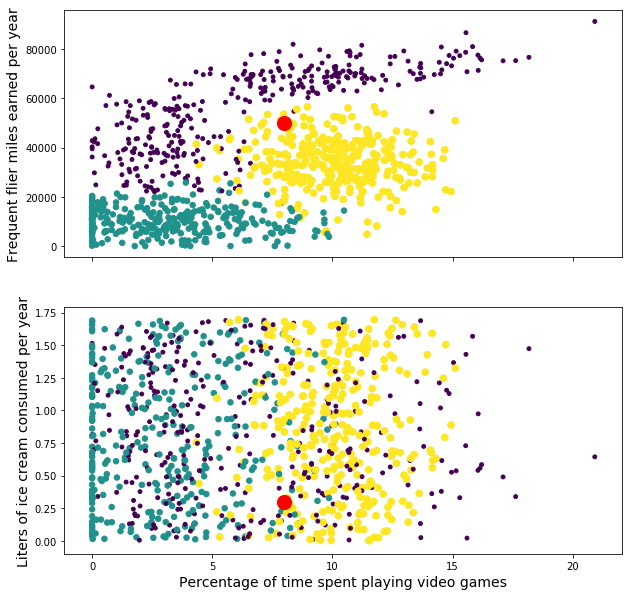

In [262]:
classifyPerson(8,50000,0.3)

**Classify handwritten digits**

In [269]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [318]:
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('./SourceMaterial/Ch02/digits/trainingDigits') #load the training set
#     m = len(trainingFileList)
    m = 1000
    trainingMat = zeros((m,1024))
    print('Training...')
    for i in range(m):        
        if (i % 100)==0:
            print('%04d/%04d' % (i, m))
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('./SourceMaterial/Ch02/digits/trainingDigits/%s' % fileNameStr)
    testFileList = listdir('./SourceMaterial/Ch02/digits/testDigits') #iterate through the test set
    errorCount = 0.0
#     mTest = len(testFileList)    
    mTest = 750
    print('Testing...')
    for i in range(mTest):                
        if (i % 100)==0:
            print("%04d/%04d" % (i, mTest))
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('./SourceMaterial/Ch02/digits/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 5)
#         print "the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr)
        if (classifierResult != classNumStr): errorCount += 1.0
    print "\nthe total number of errors is: %d" % errorCount
    print "\nthe total error rate is: %f" % (errorCount/float(mTest))

In [319]:
handwritingClassTest()

Training...
0000/1000
0100/1000
0200/1000
0300/1000
0400/1000
0500/1000
0600/1000
0700/1000
0800/1000
0900/1000
Testing...
0000/0750
0100/0750
0200/0750
0300/0750
0400/0750
0500/0750
0600/0750
0700/0750

the total number of errors is: 186

the total error rate is: 0.248000
